In [1]:
import pandas as pd

In [5]:
df=pd.read_csv('c:/dataset/classification/fruits.csv')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10)

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_new=sc.fit_transform(X_train)
X_test_new=sc.transform(X_test)

In [36]:
from sklearn.svm import SVC

In [50]:
svc=SVC(kernel='linear',C=1,probability=True)
svc.fit(X_train_new,y_train)
print("Training Score:",svc.score(X_train_new,y_train))
print("Testing Score:",svc.score(X_test_new,y_test))

Training Score: 1.0
Testing Score: 0.8333333333333334


In [51]:
import matplotlib.pyplot as plt
import seaborn as sb 


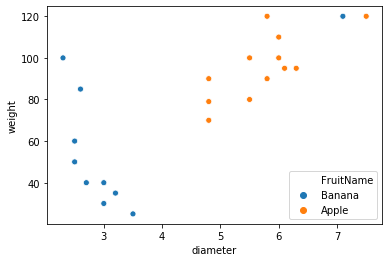

In [52]:
sb.scatterplot(x='diameter',y='weight',data=df,hue='FruitName')
plt.show()

In [53]:
svc.n_support_

array([1, 2])

In [54]:
svc.support_vectors_

array([[-0.03026279, -0.28079227],
       [-1.62122093, -0.61606661],
       [-0.9295    , -1.78952682]])

In [55]:
X_train_new

array([[-1.13701628, -1.45425248],
       [-0.03026279,  0.38975643],
       [-1.62122093, -0.61606661],
       [ 0.79980232,  1.06030512],
       [-1.62122093, -0.95134096],
       [ 0.66145814,  0.38975643],
       [-0.03026279, -0.28079227],
       [ 0.66145814,  1.39557947],
       [ 0.79980232,  0.72503077],
       [ 1.0073186 ,  0.5573936 ],
       [ 0.45394186,  0.72503077],
       [ 1.83738372,  1.39557947],
       [-1.27536046, -1.62188965],
       [-0.9295    , -1.78952682],
       [ 0.45394186,  0.05448208],
       [-0.03026279,  0.02095465]])

In [56]:
test_sample=[2.9,41]

In [57]:
test_sample_new=sc.transform([test_sample])

In [58]:
svc.coef_

array([[-1.11865921, -0.65886999]])

In [59]:
svc.intercept_

array([-1.21907343])

In [60]:
#compute distance of test point with hyperplane
distance=svc.coef_[0][0]*test_sample_new[0][0]+svc.coef_[0][1]*test_sample_new[0][1]+svc.intercept_[0]
print(distance)

1.110622283195528


In [61]:
if(distance<0):
    print('-ve class...i.e. Apple')
else:
    print('+ve class...i.e. Banana')

+ve class...i.e. Banana


In [62]:
#distance using library function
distance=svc.decision_function(test_sample_new)
print(distance)

[1.11062228]


In [63]:
svc.predict(test_sample_new)

array(['Banana'], dtype=object)

In [64]:
svc.predict_proba(test_sample_new)

array([[0.17629603, 0.82370397]])

In [65]:
df=pd.read_csv('c:/dataset/classification/iris.csv')

In [66]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [67]:
from sklearn.svm import SVC

In [68]:
svc=SVC(kernel='linear',decision_function_shape='ovr',probability=True)

In [69]:
svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [70]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [74]:
svc.coef_,svc.intercept_

(array([[-0.04625854,  0.5211828 , -1.00304462, -0.46412978],
        [-0.00722313,  0.17894121, -0.53836459, -0.29239263],
        [ 0.59549776,  0.9739003 , -2.03099958, -2.00630267]]),
 array([1.4528445 , 1.50771313, 6.78097119]))

In [71]:
y[0]

0

In [72]:
test_sample=X[0]

In [76]:
svc.decision_function([test_sample])

array([[ 2.24627744,  1.2980152 , -0.30616012]])

In [77]:
svc.predict([test_sample])

array([0], dtype=int64)

In [78]:
svc.predict_proba([test_sample])

array([[0.97602417, 0.0156961 , 0.00827973]])